In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
# Loading the data
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
# Scaling pixels between 0 and 1
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [7]:
# Creating the encoder

# The roiginal pics are 28x28
encoder_input = keras.Input(shape=(28,28,1), name='img')
x = keras.layers.Flatten() (encoder_input)

In [8]:
# This encoder_out is the image that we can feed in neural network as it contains
# less feature/information. You can change 64 to some other value (you have to change 
# line 89 accordingly)
encoder_out = keras.layers.Dense(64, activation='relu') (x)

encoder = keras.Model(encoder_input, encoder_out, name='encoder')

In [12]:
# 28x28 = 784
decoder_input = keras.layers.Dense(784, activation='relu') (encoder_out)

decoder_outout = keras.layers.Reshape((28,28,1))(decoder_input)

opt = keras.optimizers.Adam(learning_rate=0.001, weight_decay=1e-6)

In [13]:
# Auto encoder

auto_encoder = keras.Model(encoder_input, decoder_outout, name='auto_encoder')

print(auto_encoder.summary())

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 784)               50960     
                                                                 
 reshape_3 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 101200 (395.31 KB)
Trainable params: 101200 (395.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [14]:
# Training the auto-encoder
auto_encoder.compile(opt, loss='mse')
auto_encoder.fit(x_train,x_train, epochs=6, batch_size=32, validation_split=0.1)

Epoch 1/6
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0188 - val_loss: 0.0130
Epoch 2/6
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0123 - val_loss: 0.0117
Epoch 3/6
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0114 - val_loss: 0.0112
Epoch 4/6
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 5/6
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 6/6
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0108 - val_loss: 0.0108


In [16]:
# The whole point of this excercise is to reduce the features of image to lower 
# value thus by making it calculation feasible for neural networks

# Predict the encoder
example = encoder.predict(x_test[4].reshape(-1,28,28,1))[0]
print(example)

1/1 [==============================] - 0s 23ms/step
[1.183981   1.2308509  0.45507008 2.6967716  0.77084076 1.5800993
 0.5085908  0.8403289  1.8720001  0.27709678 0.37251717 3.0384748
 0.9506029  1.2016895  0.8445872  0.35038924 0.58382857 0.906916
 0.6361517  0.81560117 0.900438   0.5996139  1.4284406  0.89376366
 1.530796   1.6858755  1.0978428  0.87551    0.8839319  0.8243965
 1.4785829  1.0158755  0.682752   1.0685139  2.3080888  0.7393916
 0.47884536 0.13127922 1.64822    0.76843023 0.65867543 1.178751
 0.8235481  0.16652057 0.6768006  1.9553137  0.57480556 0.9219864
 0.84105384 0.38702664 2.0437202  1.2445779  1.9768234  0.13976392
 2.210663   2.075056   1.2736636  1.8061937  0.80699354 1.1033311
 0.68294835 1.7137599  1.5610734  0.5574057 ]


In [17]:
# The shape will tell us that instead of 28x28 = 784 features we have now only 64 features
print(example.shape)

(64,)


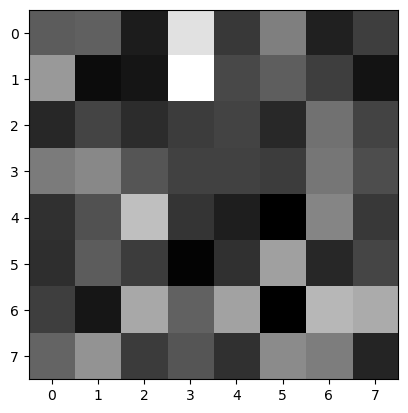

In [18]:
# Printing the encoded image - it will look blurr but it has most of the informations of the 
# original image
plt.imshow(example.reshape(8,8), cmap='gray')

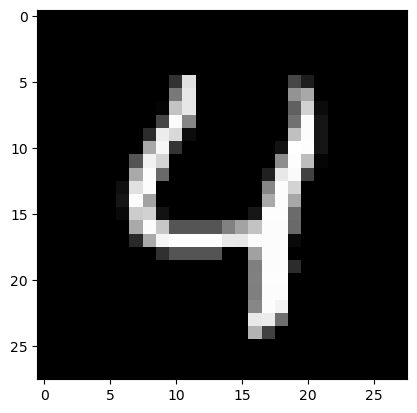

In [19]:
#%%
# Let us check what the testing image actually contains
plt.imshow(x_test[4], cmap='gray')

1/1 [==============================] - 0s 56ms/step


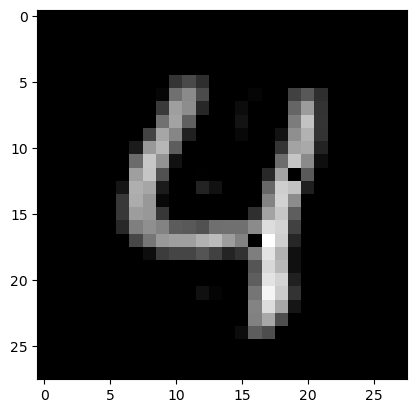

In [20]:
# Let us validate that the encoder actually worked

# Use the auto encoder (which contains both the encoder and decoder) to predict/regenerate
# the test image. The generated otuput i.e ae_out is the result of first converting x_test
# to encoded image of size 64 i.e 8x8 and then decoding it back to 784 i.e 28x28. 
# During this procedure we are going to definitely loose some information but the whole 
# purpose of it is to reduce the image so that the encoded image can be put to neural network 
# to make it calculation efficient and decoding the whole thing back is just to check 
# if we get back an image that is closely related to the actual input image. Remember the encoded
# image had less information and that is the reason decoded image is not 100% same as the input image
# but close enough.

ae_out = auto_encoder.predict(x_test[4].reshape(-1,28,28,1))[0]
plt.imshow(ae_out, cmap='gray')

In [21]:
# Now let us add some noise in the pic and see how this auto_encoder can remove 
# the noise successfully.

import random

def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance :
                new_val = random.uniform(0,1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
                
    return np.array(noisy)

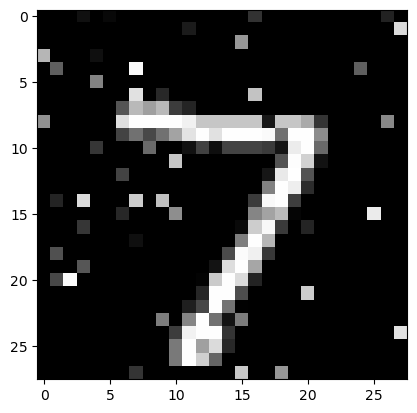

In [22]:
noisy = add_noise(x_test[0])
plt.imshow(noisy, cmap='gray')

1/1 [==============================] - 0s 22ms/step


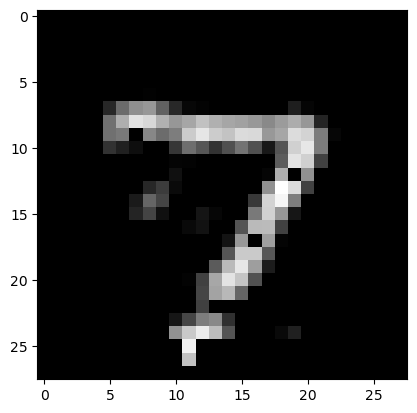

In [23]:
# Basically what we are doing is adding some noise in the pic. Now, our auto encoder 
# was trained on the clean images (unsupervised way), so when you pass a noisy image
# it will first encode the image down to 64 features and then decode it back to 
# 784 features. while ding that it will remove the noise because it will understand that
# the noise was not part of the training data and the image belongs to one of the 10 
# different class of digits that we have already seen. As it does not recognize the noise 
# it will simply not encode the noise and/or not decode the noise and thus we get the 
# output without noise.

ae_out = auto_encoder.predict(noisy.reshape(-1,28,28,1))[0]
plt.imshow(ae_out, cmap='gray')